In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [2]:
import sys
import os 
sys.path.insert(0, os.path.abspath('../packages'))
import steps, functions, optimizers

In [3]:
step = steps.GoldenSectionStep(da = 0.01, tol = 1e-8, check_direction=True)#, normalize=True)

In [4]:
def f(x1, x2):

    return x1**2 - 3*x1*x2 + 4*x2**2 + x1 - x2

def gradf(x1, x2):

    return np.array(
        [2*x1 - 3*x2 + 1, -3*x1 + 8*x2 - 1]
    )

def hessf(x1, x2):

    return np.array(
        [
        [ 2, -3],
        [-3,  8]
        ]
    )

#f = functions.NumericalSpecialFunction(f)
f = functions.AnalyticalSpecialFunction(f, gradf, hessf)

p_inicial = np.array([1, 2])

In [5]:
optimizrs = [
    #('Univariant', optimizers.UnivariantOptimizer(tol=1e-5)),
    #('Powell', optimizers.PowellOptimizer(tol=1e-5)),
    #('SteepestDesc', optimizers.SteepestDescentOptimizer(tol=1e-5)),
    #('FletchReeves', optimizers.FletcherReevesOptimizer(tol=1e-5)),
    #('NewtonRaph', optimizers.NewtonRaphsonOptimizer(tol=1e-5)),
    ('BFGS', optimizers.BFGSOptimizer(tol=1e-5)),
]

[[  -93.8930861    340.67340055]
 [  379.57234438 -1361.69360221]]
[[ 1.00000019e+00  5.82884420e-08]
 [-8.73255174e-07  9.99999739e-01]]
[[ 9.99993013e-01 -1.54947260e-06]
 [ 2.79498855e-05  1.00000620e+00]]
[[ 1.00000000e+00 -1.74045361e-11]
 [ 2.80970816e-10  1.00000000e+00]]
[[ 1.00000000e+00  1.47769466e-11]
 [-2.34833287e-10  1.00000000e+00]]
[[ 1.00000000e+00 -2.25642839e-11]
 [ 3.64448965e-10  1.00000000e+00]]
[[ 1.00000000e+00  1.53779864e-11]
 [-2.44368413e-10  1.00000000e+00]]
[[ 1.00000000e+00 -2.84772211e-11]
 [ 4.60084539e-10  1.00000000e+00]]
[[ 1.00000000e+00  1.52517187e-11]
 [-2.42375253e-10  1.00000000e+00]]
[[ 1.00000000e+00 -2.45996935e-11]
 [ 3.97365543e-10  1.00000000e+00]]
[[ 1.00000000e+00  1.53183587e-11]
 [-2.43426372e-10  1.00000000e+00]]
[[ 1.00000000e+00 -2.69652855e-11]
 [ 4.35627231e-10  1.00000000e+00]]
[[ 1.00000000e+00  1.43486547e-11]
 [-2.28021493e-10  1.00000000e+00]]
[[ 1.00000000e+00 -2.32896947e-11]
 [ 3.76179775e-10  1.00000000e+00]]
[[ 1.00000

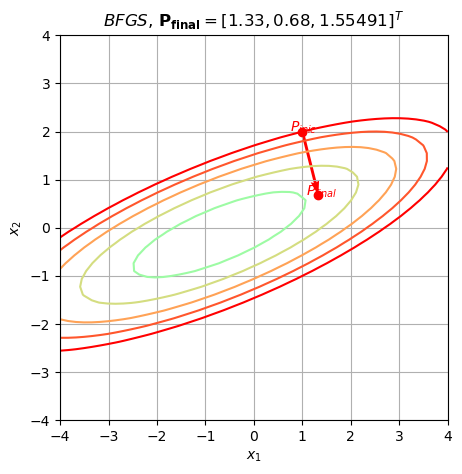

In [6]:
item = 'a'

x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


for name, optimizer in optimizrs:
    t_init = datetime.datetime.now()
    p_final = optimizer(f, p_inicial, step)
    t_final = datetime.datetime.now()
    print(f'{name}: p_final = [{p_final[0]:.6f}\\\\ {p_final[1]:.6f}\\\\ {f(*p_final):.6f}].T. Execução:{t_final - t_init}, {optimizer.iter} iterações')
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.contour(X, Y, Z, np.linspace(-10, 10, 10),cmap='rainbow')
    ax.plot(*p_inicial, 'ro')
    ax.text(p_inicial[0]-0.25, p_inicial[1], '$P_{inic}$', color='red')
    ax.plot(*p_final, 'ro')
    ax.text(p_final[0]-0.25, p_final[1], '$P_{final}$', color='red')
    cache = optimizer.get_history()
    for i in range(len(cache)-1):
        p_i = cache[i]
        p_f = cache[i+1]
        ax.quiver(p_i[0], p_i[1], p_f[0]-p_i[0], p_f[1]-p_i[1], color='red', angles='xy', scale_units='xy', scale=1)#, label='Passo completo')
    ax.grid()
    #ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'${name}$, $\mathbf{{P_{{final}}}} = [{p_final[0]:.2f}, {p_final[1]:.2f}, {f(*p_final):.5f}]^T$')
    fig.savefig(f'images/q1{item}_{name}.pdf')

In [7]:
[np.linalg.norm(grd) for grd in optimizrs[-1][-1].cache_grad]

[12.36931687685298,
 1.6867250025260714,
 1.6930796547731473,
 1.6868745127534646,
 1.6865397559734592,
 1.6869006810239988,
 1.6865458830317892,
 1.6869153826477754,
 1.6865405414580124,
 1.6869054425599692,
 1.686543346817204,
 1.6869110476659288,
 1.6865410132174434,
 1.6869012312256144,
 1.6865437782863741,
 1.6869160463360495,
 1.68653839973371,
 1.6868962264927017,
 1.6865444715646851,
 1.6869164469324627,
 1.6865373051433012,
 1.6868965495401622,
 1.6865434022447932,
 1.6869168520093578,
 1.686536209094537,
 1.686896876756659,
 1.6865423315657369,
 1.6869115675758335,
 1.6865369935141243,
 1.686901634360613,
 1.6865397966351299,
 1.686907235187354,
 1.6865374644308513,
 1.6869033611878428,
 1.6865382646727212,
 1.6868995318898103,
 1.686539050347837,
 1.6869051102208255,
 1.6865367254745511,
 1.6869012494770852,
 1.6865375213975073,
 1.6869068816624602,
 1.6865351789760046,
 1.6868970223117274,
 1.686537958030009,
 1.6869025771349981,
 1.686535640818283,
 1.6868987302434633,
 1.

In [8]:
optimizrs[-2][-1].cache_x

IndexError: list index out of range